In [1]:
import os
import pandas as pd

In [2]:
from glob import glob

tracks_dir = "/playpen-storage/levlevi/player-re-id/src/player_reid/ocr_analysis/tracks"
tracks = glob(tracks_dir + "/*.txt")

In [3]:
lengths = []
for fp in tracks:
    with open(fp, 'r') as f:
        lines = f.readlines()
    index = ['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf', 'pad2', 'pad3', 'pad4']
    df = pd.read_csv(fp, names=index)[['frame', 'entity_id', 'x1', 'y1', 'width', 'height', 'conf']]
    entities = df.entity_id.unique()
    for entity in entities:
        entity_df = df[df.entity_id == entity]
        lengths.append(len(entity_df))        

print(f"Mean: {sum(lengths)/len(lengths)}")

Mean: 153.8159509202454


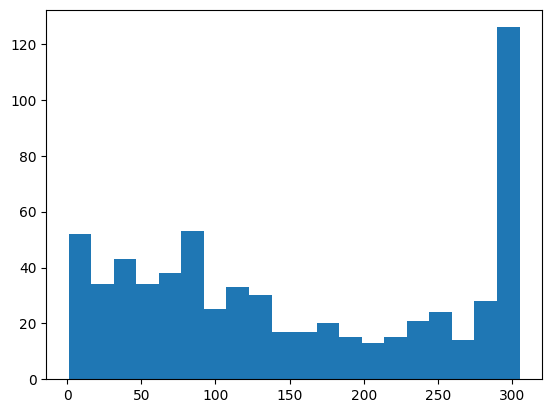

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(lengths, bins=20);
plt.show();